سوال 1:  
با استفاده از تابع

firwin از کتابخانه scipy،

یک فیلتر پایین‌گذر FIR با 51 ضریب و فرکانس قطع 0.3 طراحی کنید.  
1. پاسخ ضربه‌ای را رسم کنید.  
2. پاسخ فرکانسی آن را نیز نمایش دهید.


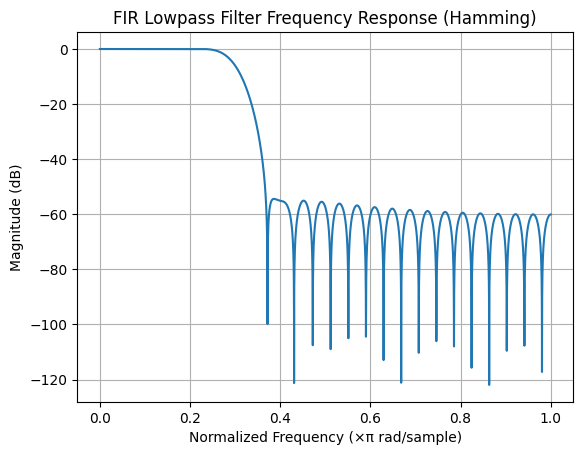

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz

numtaps = 51
cutoff = 0.3
fir_lp = firwin(numtaps, cutoff, window='hamming')

w, h = freqz(fir_lp, worN=8000)
plt.plot(w/np.pi, 20*np.log10(np.abs(h)))
plt.title("FIR Lowpass Filter Frequency Response (Hamming)")
plt.xlabel("Normalized Frequency (×π rad/sample)")
plt.ylabel("Magnitude (dB)")
plt.grid(True)
plt.show()


سوال 2:  
سیگنال

x[n] = sin(2π0.1n) + noise

را در نظر بگیرید.  
1. روی این سیگنال یک فیلتر FIR پایین‌گذر اعمال کرده و نتیجه را رسم کنید.  
2. اثر فیلتر را بررسی نمایید.


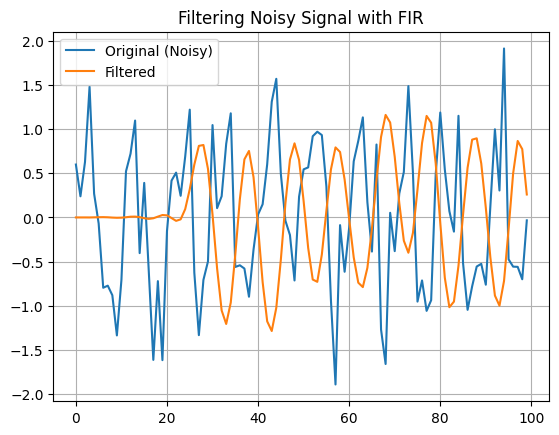

In [2]:
from scipy.signal import lfilter

n = np.arange(0, 100)
x = np.sin(2 * np.pi * 0.1 * n) + 0.5 * np.random.randn(len(n))
y = lfilter(fir_lp, 1.0, x)

plt.plot(n, x, label="Original (Noisy)")
plt.plot(n, y, label="Filtered")
plt.legend()
plt.title("Filtering Noisy Signal with FIR")
plt.grid(True)
plt.show()


سوال 3:  
فیلتر FIR با ضرایب متقارن طراحی کنید  
1. بررسی کنید آیا فاز پاسخ فرکانسی خطی است یا نه.


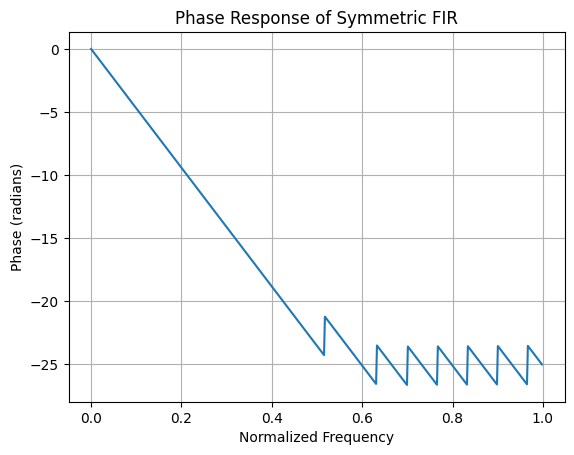

In [3]:
fir_sym = firwin(31, 0.4, window="hamming", pass_zero=True)
w, h = freqz(fir_sym)

plt.plot(w/np.pi, np.unwrap(np.angle(h)))
plt.title("Phase Response of Symmetric FIR")
plt.xlabel("Normalized Frequency")
plt.ylabel("Phase (radians)")
plt.grid(True)
plt.show()


سوال 5:  
یک فیلتر FIR میان‌گذر طراحی کنید که باند 0.3 تا 0.6 را عبور دهد.  
پاسخ فرکانسی آن را رسم کنید.


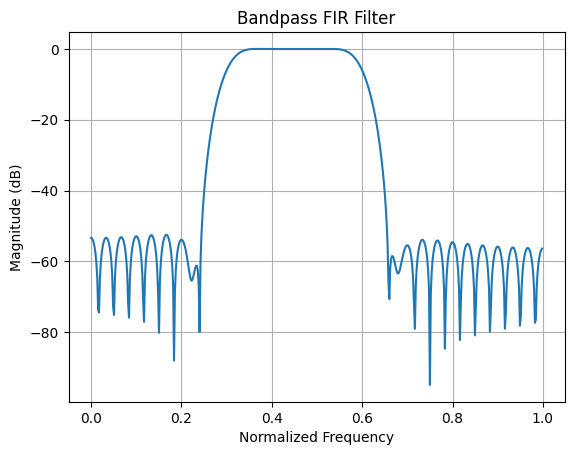

In [4]:
fir_bp = firwin(61, [0.3, 0.6], pass_zero=False, window="hamming")
w, h = freqz(fir_bp)

plt.plot(w/np.pi, 20*np.log10(np.abs(h)))
plt.title("Bandpass FIR Filter")
plt.xlabel("Normalized Frequency")
plt.ylabel("Magnitude (dB)")
plt.grid(True)
plt.show()


سوال 6:  
تاخیر گروهی یک فیلتر FIR متقارن با 51 ضرب را محاسبه و رسم کنید.  
(تأخیر گروهی برای فیلترهای فاز خطی ثابت است.)


In [5]:
fir = firwin(51, 0.4)
group_delay = (len(fir) - 1) / 2

print(f"Group delay = {group_delay} samples")


Group delay = 25.0 samples


سوال 7:  
سیگنال x(t) = sinc(t) * rect(t/2) را تعریف کنید و انرژی آن را محاسبه کنید.


Energy of windowed sinc: 0.9028


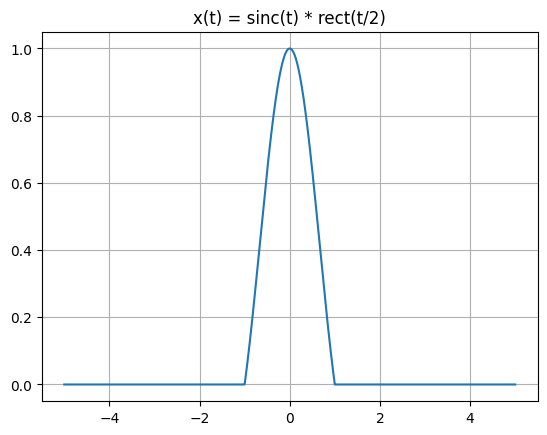

In [6]:
t = np.linspace(-5, 5, 2048)
x = np.sinc(t) * (np.abs(t) <= 1)

from scipy.integrate import simpson
energy = simpson(x**2, t)

print(f"Energy of windowed sinc: {energy:.4f}")
plt.plot(t, x)
plt.title("x(t) = sinc(t) * rect(t/2)")
plt.grid(True)
plt.show()


سوال 8:  
سیگنال x(t) = sin(2πt) + sin(3πt) را در بازه [0, 5] رسم کنید و طیف آن را نمایش بدهید.


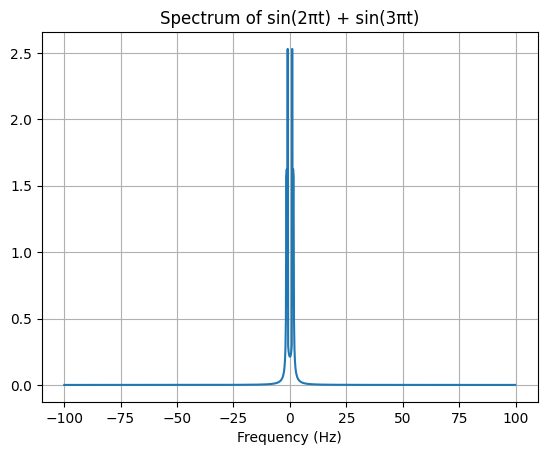

In [7]:
t = np.linspace(0, 5, 1000)
x = np.sin(2*np.pi*t) + np.sin(3*np.pi*t)

from scipy.fft import fft, fftfreq, fftshift
dt = t[1] - t[0]
f = fftshift(fftfreq(len(t), dt))
X = fftshift(fft(x)) * dt

plt.plot(f, np.abs(X))
plt.title("Spectrum of sin(2πt) + sin(3πt)")
plt.xlabel("Frequency (Hz)")
plt.grid(True)
plt.show()


سوال 9:  
یک سیگنال x(t) = sinc(t) را با پنجره‌های مختلف (Rect, Hamming) ضرب کنید و طیف آنها را مقایسه کنید.


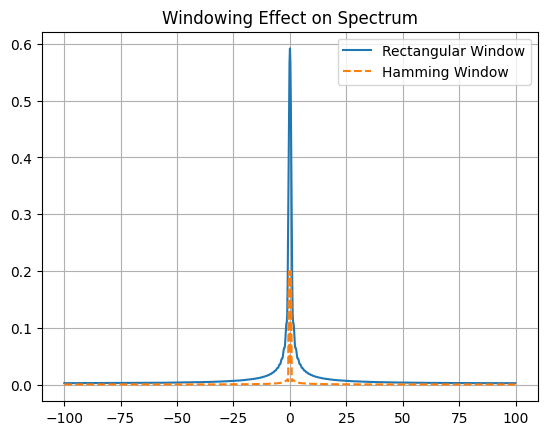

In [8]:
rect = (np.abs(t) <= 1).astype(float)
hamming = np.hamming(len(t))

x_rect = np.sinc(t) * rect
x_ham = np.sinc(t) * hamming

X_rect = fftshift(fft(x_rect)) * dt
X_ham = fftshift(fft(x_ham)) * dt

plt.plot(f, np.abs(X_rect), label="Rectangular Window")
plt.plot(f, np.abs(X_ham), '--', label="Hamming Window")
plt.title("Windowing Effect on Spectrum")
plt.legend()
plt.grid(True)
plt.show()


سوال 10:  
سیگنال x(t) = u(t) را در بازه [0, 10] تعریف کنید و تبدیل فوریه عددی آن را محاسبه و رسم کنید.


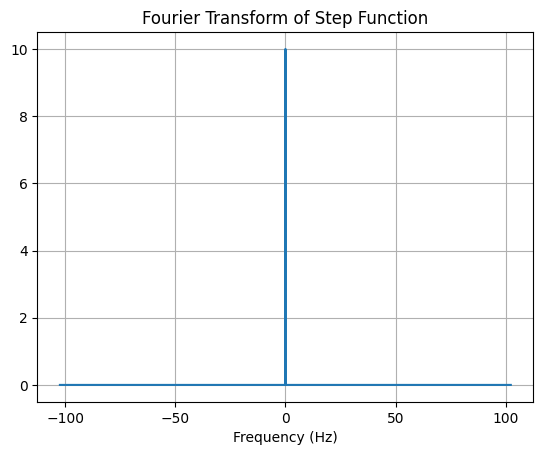

In [9]:
t = np.linspace(0, 10, 2048)
x = np.ones_like(t)

X = fftshift(fft(x)) * (t[1] - t[0])
f = fftshift(fftfreq(len(t), t[1] - t[0]))

plt.plot(f, np.abs(X))
plt.title("Fourier Transform of Step Function")
plt.xlabel("Frequency (Hz)")
plt.grid(True)
plt.show()
